# Community analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing database

In [43]:
events = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/Chicago_Park_District_-_Event_Permits.csv")
events.head()

,Requestor,Organization,Park Number,Park/Facility Name,Reservation Start Date,Reservation End Date,Event Type,Event Description,Permit Status
0,Melissa Flynn,--,100.0,Lincoln Grove 1801-2011 N. Clark St.,11/21/2020,11/21/2020,Permit - Event 1 Cluster 3,Green City Market,Approved
1,Frank Maugeri,--,529.0,Park No. 529 Entire Grounds,10/12/2020,10/12/2020,Permit - Event 1 Cluster 1,Panoramic Prayers,Approved
2,Tony McCoy,--,21.0,Washington Entire Grounds,10/12/2020,10/12/2020,Permit - Event 1 Cluster 1,CPS Cross Country Championship,Approved
3,Zoe Rain,--,210.0,Union Entire Grounds,09/29/2020,09/29/2020,Permit - Media: Filming Level 2,Wilson Media at Wrightwood and Union Parks 9.2...,Approved
4,The Rotary Club Of Chicago Karyn Linn,--,481.0,Ping Tom Skyline Patio,08/04/2020,08/04/2020,Venue Rental - Social,The Rotary Club of Chicago Meeting #41640,Approved


In [44]:
events["Event Type"].unique()

array(['Permit - Event 1 Cluster 3', 'Permit - Event 1 Cluster 1',
       'Permit - Media: Filming Level 2', 'Venue Rental - Social',
       'Venue Rental - Philanthropic',
       'Permit - Media: Non-Commercial Photography Online',
       'Permit - Media: Still Photography',
       'Permit - Media: Non-Commercial Photography',
       'Permit - Athletic Training', 'Permit - Event 1 Cluster 2',
       'Administrative Reservation - Information Only',
       'Permit - Media: Filming Level 1', 'Permit - Athletic T Cluster 3',
       'Permit - Picnic Level 1', 'Permit - Media: Filming Level 4',
       'Administrative Reservation - Internal Hold PARKS',
       'Permit - Event 2 Cluster 3', 'Permit - Athletic T Cluster 2',
       'Permit - Media: Filming Level 3',
       'Administrative Reservation - Internal Hold REVENUE',
       'Permit - Promotions', 'Permit - Athletic Event Level 4',
       'Permit - Media: Student Filming/Photography',
       'Venue Rental - Wedding', 'Permit - Athletic 

In [2]:
crimes = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/Crimes_-_2015_to_2020.csv")

In [3]:
crimes.head(20)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,924,9.0,12.0,61.0,2015,2018-02-10 15:50:01,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,0,0,1511,15.0,29.0,25.0,2015,2018-02-10 15:50:01,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,1,0,1412,14.0,35.0,21.0,2015,2018-02-10 15:50:01,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,0,1,1522,15.0,28.0,25.0,2015,2018-02-10 15:50:01,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,BURGLARY,FORCIBLE ENTRY,RESIDENCE,0,0,614,6.0,21.0,71.0,2015,2018-02-10 15:50:01,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,2015-09-04 18:00:00,021XX W CHURCHILL ST,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,0,0,1434,14.0,32.0,24.0,2015,2018-02-10 15:50:01,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,2015-09-05 13:00:00,025XX W CERMAK RD,THEFT,RETAIL THEFT,GROCERY FOOD STORE,1,0,1034,10.0,25.0,31.0,2015,2015-09-17 11:37:18,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,2015-09-05 11:30:00,031XX W WASHINGTON BLVD,ROBBERY,STRONGARM - NO WEAPON,STREET,0,1,1222,12.0,27.0,27.0,2015,2018-02-10 15:50:01,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,0,0,824,8.0,15.0,63.0,2016,2019-04-06 16:04:43,NaN,NaN,NaN


In [4]:
crimes.set_index(crimes.ID, inplace=True)

In [5]:
crimes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1541733.0,NaN,NaN,NaN,11102325.804722,860134.560531,21714.0,10571765.0,11156741.0,11687324.0,12305810.0
Case Number,1541733,1541546,HZ140230,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1541733,702137,2015-01-01 00:01:00,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,1541733,35135,001XX N STATE ST,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Type,1541733,35,THEFT,352089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1541733,492,SIMPLE,168057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Description,1535379,192,STREET,347634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,1541733.0,NaN,NaN,NaN,0.206649,0.404902,0.0,0.0,0.0,0.0,1.0
Domestic,1541733.0,NaN,NaN,NaN,0.165116,0.371285,0.0,0.0,0.0,0.0,1.0
Beat,1541733.0,NaN,NaN,NaN,1143.751639,694.631456,111.0,612.0,1024.0,1712.0,2535.0


In [6]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                    int64
Domestic                  int64
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
# Define "Date" and "Updated on" columns as datetime type
crimes.Date = pd.to_datetime(crimes.Date)
crimes["Updated On"] = pd.to_datetime(crimes["Updated On"])

crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Understanding the correlations between my numerical variables

<AxesSubplot:>

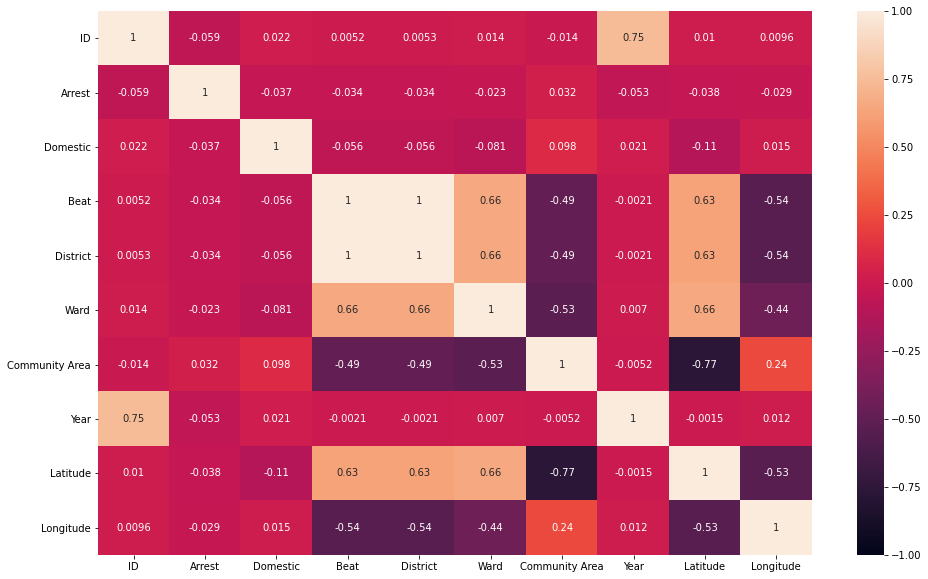

In [8]:
fig = plt.figure(figsize=(16,10))
sns.heatmap(crimes.select_dtypes(include=np.number).corr(), vmin=-1.0, annot=True)

<AxesSubplot:>

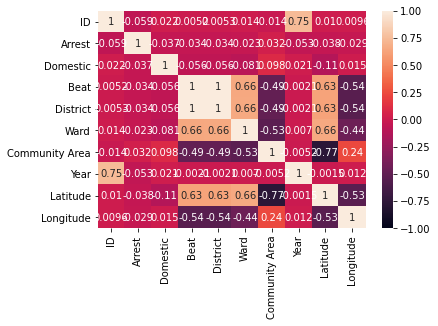

In [9]:
sns.heatmap(crimes.select_dtypes(exclude="object").corr(), vmin=-1.0, annot=True)

## Arrests and Domestic variable per community

In [21]:
# Percentage of domestic crimes by community
rates_per_community = (crimes.pivot_table(values="Domestic",index="Community Area", aggfunc='sum')/
                        crimes.pivot_table(values="Domestic",index="Community Area", aggfunc='count'))
rates_per_community

,Domestic
Community Area,
1.0,0.135878
2.0,0.137555
3.0,0.106263
4.0,0.091947
5.0,0.061889
...,...
73.0,0.204801
74.0,0.168346
75.0,0.187568


In [22]:
rates_per_community = pd.concat([rates_per_community,(
                        crimes.pivot_table(values="Arrest",index="Community Area", aggfunc='sum')/
                        crimes.pivot_table(values="Arrest",index="Community Area", aggfunc='count'))],axis=1)
rates_per_community

,Domestic,Arrest
Community Area,,
1.0,0.135878,0.173967
2.0,0.137555,0.132630
3.0,0.106263,0.188419
4.0,0.091947,0.132432
5.0,0.061889,0.108369
...,...,...
73.0,0.204801,0.191937
74.0,0.168346,0.132484
75.0,0.187568,0.187317


In [23]:
rates_per_community.sort_values(by="Domestic", ascending=False)

,Domestic,Arrest
Community Area,,
54.0,0.267670,0.212304
43.0,0.248271,0.194865
53.0,0.243319,0.212962
40.0,0.242466,0.176843
71.0,0.241075,0.236397
...,...,...
6.0,0.052247,0.144050
76.0,0.051887,0.258819
8.0,0.045536,0.173390


In [24]:
rates_per_community.describe()

,Domestic,Arrest
count,77.000000,77.000000
mean,0.161981,0.181927
std,0.057569,0.064208
min,0.029355,0.080271
25%,0.122572,0.134902
50%,0.173653,0.175850
75%,0.205430,0.212304
max,0.267670,0.418668


In [25]:
# Arrests for non-domestic and domestic crimes by community area
domestic_community = (crimes.pivot_table(values="Arrest",index="Community Area", columns=["Domestic"],aggfunc='sum')
                     /crimes.pivot_table(values="Arrest",index="Community Area", columns=["Domestic"],aggfunc='count'))
domestic_community

Domestic,0,1
Community Area,,
1.0,0.171134,0.191982
2.0,0.122923,0.193490
3.0,0.187139,0.199183
4.0,0.126015,0.195798
5.0,0.103766,0.178138
...,...,...
73.0,0.202247,0.151905
74.0,0.132217,0.133803
75.0,0.196283,0.148479


In [26]:
domestic_community['Diff'] = domestic_community[0].sub(domestic_community[1], axis = 0) 
domestic_community

Domestic,0,1,Diff
Community Area,,,
1.0,0.171134,0.191982,-0.020848
2.0,0.122923,0.193490,-0.070567
3.0,0.187139,0.199183,-0.012044
4.0,0.126015,0.195798,-0.069782
5.0,0.103766,0.178138,-0.074372
...,...,...,...
73.0,0.202247,0.151905,0.050342
74.0,0.132217,0.133803,-0.001586
75.0,0.196283,0.148479,0.047803


In [27]:
domestic_community.describe()

Domestic,0,1,Diff
count,77.000000,77.000000,77.000000
mean,0.186073,0.172345,0.013728
std,0.077510,0.026820,0.080572
min,0.076394,0.116953,-0.096424
25%,0.126015,0.153147,-0.045478
50%,0.177666,0.170606,-0.010931
75%,0.224640,0.189305,0.048245
max,0.477289,0.238776,0.337617


<AxesSubplot:>

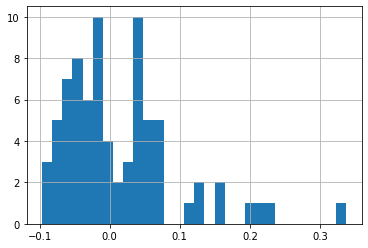

In [28]:
domestic_community["Diff"].hist(bins=30)

## Analyzing Beats

- **Beat** - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

In [29]:
crimes.Beat.value_counts()

1834    16328
421     12705
511     11743
111     11637
1831    11545
        ...  
2022     2041
1621     1830
1653     1251
1655      474
1652      374
Name: Beat, Length: 274, dtype: int64

<AxesSubplot:>

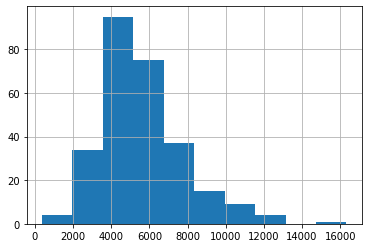

In [30]:
crimes.Beat.value_counts().hist()

In [31]:
crimes.Beat.describe()

count    1.541733e+06
mean     1.143752e+03
std      6.946315e+02
min      1.110000e+02
25%      6.120000e+02
50%      1.024000e+03
75%      1.712000e+03
max      2.535000e+03
Name: Beat, dtype: float64

In [32]:
crimes.Beat.describe()/crimes.Beat.mean()

count    1347.961348
mean        1.000000
std         0.607327
min         0.097049
25%         0.535081
50%         0.895299
75%         1.496828
max         2.216390
Name: Beat, dtype: float64

In [33]:
crimes[["Beat","Arrest", "Domestic"]].corr()

,Beat,Arrest,Domestic
Beat,1.000000,-0.033611,-0.056315
Arrest,-0.033611,1.000000,-0.036629
Domestic,-0.056315,-0.036629,1.000000
